In [3]:
import pandas as pd
fear_greed_df = pd.read_csv('fear_greed_index.csv')
historical_df = pd.read_csv('historical_data.csv')

In [4]:
print("Fear & Greed Index Sample:")
display(fear_greed_df.head())

print("Historical Trader Data Sample:")
display(historical_df.head())

Fear & Greed Index Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Historical Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
# 4. Check data types and missing values
print("Fear & Greed Index Info:")
fear_greed_df.info()
print("\nHistorical Trader Data Info:")
historical_df.info()

Fear & Greed Index Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Historical Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224

In [7]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce', dayfirst=True)

In [8]:
print("Unique classifications in Fear & Greed Index:")
print(fear_greed_df['classification'].unique())

# Check for duplicates
print("Duplicates in Fear & Greed Index:", fear_greed_df.duplicated().sum())

Unique classifications in Fear & Greed Index:
['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']
Duplicates in Fear & Greed Index: 0


In [10]:
if pd.api.types.is_numeric_dtype(historical_df['Timestamp']):
    # Try milliseconds
    historical_df['Timestamp'] = pd.to_datetime(historical_df['Timestamp'], unit='ms', errors='coerce')
else:
    historical_df['Timestamp'] = pd.to_datetime(historical_df['Timestamp'], errors='coerce')

In [11]:
# Check for missing values
print("\nMissing values in Historical Trader Data:")
print(historical_df.isnull().sum())

# Show column names for reference
print("\nHistorical Trader Data columns:")
print(historical_df.columns)


Missing values in Historical Trader Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Historical Trader Data columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [12]:
# Date ranges
print("Fear & Greed Index date range:", fear_greed_df['date'].min(), "to", fear_greed_df['date'].max())
print("Historical Data date range:", historical_df['Timestamp'].min(), "to", historical_df['Timestamp'].max())

# Unique values
print("\nUnique accounts:", historical_df['Account'].nunique())
print("Unique coins:", historical_df['Coin'].nunique())
print("Unique sides:", historical_df['Side'].unique())

# Distribution of sentiment
print("\nFear & Greed Index distribution:")
print(fear_greed_df['classification'].value_counts())

Fear & Greed Index date range: 2018-01-02 00:00:00 to 2025-12-04 00:00:00
Historical Data date range: 2023-03-28 10:40:00 to 2025-06-15 15:06:40

Unique accounts: 32
Unique coins: 246
Unique sides: ['BUY' 'SELL']

Fear & Greed Index distribution:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


In [13]:
# --- Prepare for merging ---
# Add a 'date' column to historical_df to match with fear_greed_df
historical_df['date'] = historical_df['Timestamp'].dt.normalize()  # sets time to 00:00:00

# Check a sample
display(historical_df[['Timestamp', 'date']].head())

,Timestamp,date
0,2024-10-27 03:33:20,2024-10-27
1,2024-10-27 03:33:20,2024-10-27
2,2024-10-27 03:33:20,2024-10-27
3,2024-10-27 03:33:20,2024-10-27
4,2024-10-27 03:33:20,2024-10-27


In [14]:
# Merge historical trader data with fear & greed index on 'date'
merged_df = pd.merge(
    historical_df,
    fear_greed_df[['date', 'classification', 'value']],  # Only bring in relevant columns
    on='date',
    how='left'  # Use 'left' to keep all trades, even if some dates have no sentiment data
)

In [15]:
# Check the result
print("Merged Data Sample:")
display(merged_df.head())

# Check for any trades with missing sentiment data
missing_sentiment = merged_df['classification'].isna().sum()
print(f"Number of trades with missing sentiment data: {missing_sentiment}")

Merged Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,NaN,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,NaN,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,NaN,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,NaN,NaN


Number of trades with missing sentiment data: 197121


In [16]:
print("Fear & Greed Index date range:", fear_greed_df['date'].min(), "to", fear_greed_df['date'].max())
print("Historical Data date range:", historical_df['date'].min(), "to", historical_df['date'].max())

Fear & Greed Index date range: 2018-01-02 00:00:00 to 2025-12-04 00:00:00
Historical Data date range: 2023-03-28 00:00:00 to 2025-06-15 00:00:00


In [17]:
# Find the overlap
min_sentiment_date = fear_greed_df['date'].min()
max_sentiment_date = fear_greed_df['date'].max()


In [18]:
filtered_trades = historical_df[
    (historical_df['date'] >= min_sentiment_date) &
    (historical_df['date'] <= max_sentiment_date)
]

In [19]:
merged_df = pd.merge(
    filtered_trades,
    fear_greed_df[['date', 'classification', 'value']],
    on='date',
    how='left'
)

In [20]:
print("Number of trades in overlap:", len(merged_df))
print("Sample after filtering:")
display(merged_df.head())

Number of trades in overlap: 211224
Sample after filtering:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,NaN,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,NaN,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,NaN,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,NaN,NaN


In [21]:
print("Fear & Greed Index date range:", fear_greed_df['date'].min(), "to", fear_greed_df['date'].max())
print("Historical Data date range:", historical_df['date'].min(), "to", historical_df['date'].max())

Fear & Greed Index date range: 2018-01-02 00:00:00 to 2025-12-04 00:00:00
Historical Data date range: 2023-03-28 00:00:00 to 2025-06-15 00:00:00


In [22]:
print("fear_greed_df['date'] dtype:", fear_greed_df['date'].dtype)
print("historical_df['date'] dtype:", historical_df['date'].dtype)
print("Sample dates in fear_greed_df:", fear_greed_df['date'].sort_values().unique()[:5])
print("Sample dates in historical_df:", historical_df['date'].sort_values().unique()[:5])

fear_greed_df['date'] dtype: datetime64[ns]
historical_df['date'] dtype: datetime64[ns]
Sample dates in fear_greed_df: <DatetimeArray>
['2018-01-02 00:00:00', '2018-01-03 00:00:00', '2018-01-04 00:00:00',
 '2018-01-05 00:00:00', '2018-01-06 00:00:00']
Length: 5, dtype: datetime64[ns]
Sample dates in historical_df: <DatetimeArray>
['2023-03-28 00:00:00', '2023-11-14 00:00:00', '2024-03-09 00:00:00',
 '2024-07-03 00:00:00', '2024-10-27 00:00:00']
Length: 5, dtype: datetime64[ns]


In [23]:
# Normalize both to remove time component
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date']).dt.normalize()
historical_df['date'] = pd.to_datetime(historical_df['date']).dt.normalize()

In [24]:
merged_df = pd.merge(
    historical_df,
    fear_greed_df[['date', 'classification', 'value']],
    on='date',
    how='left'
)

print("Number of trades with sentiment data:", merged_df['classification'].notna().sum())
print("Sample with sentiment data:")
display(merged_df[merged_df['classification'].notna()].head())

Number of trades with sentiment data: 14103
Sample with sentiment data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
18047,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13097,22382.0,2931.37,BUY,20-04-2024 12:28,0.0,Buy,0.0,0xbe658417a7cbb0b2f53e04088d80eb0203d500d4c445...,19330531408,True,7.83369,1.310000e+14,2024-03-09 16:00:00,2024-03-09,Fear,26.0
18048,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13100,447.0,58.56,BUY,20-04-2024 12:28,22374.0,Buy,0.0,0xbe658417a7cbb0b2f53e04088d80eb0203d500d4c445...,19330531408,True,0.15644,7.460000e+14,2024-03-09 16:00:00,2024-03-09,Fear,26.0
18049,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13100,503.0,65.89,BUY,20-04-2024 12:28,22821.0,Buy,0.0,0xb2429810a9105cffda3304088d80ed01f7005ac59b6f...,19330531408,False,0.05029,1.770000e+14,2024-03-09 16:00:00,2024-03-09,Fear,26.0
18050,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13100,39139.0,5127.21,BUY,20-04-2024 12:28,23323.0,Buy,0.0,0x5fdfde429fabc6ea597d04088d80ee016100d15b8dc3...,19330531408,False,3.91389,1.070000e+15,2024-03-09 16:00:00,2024-03-09,Fear,26.0
18051,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13100,726.0,95.11,BUY,20-04-2024 12:28,62459.0,Buy,0.0,0xb4b03e0b058a9b9be6ee04088d80ff014300e3fc5f53...,19330531408,False,0.07259,5.870000e+14,2024-03-09 16:00:00,2024-03-09,Fear,26.0


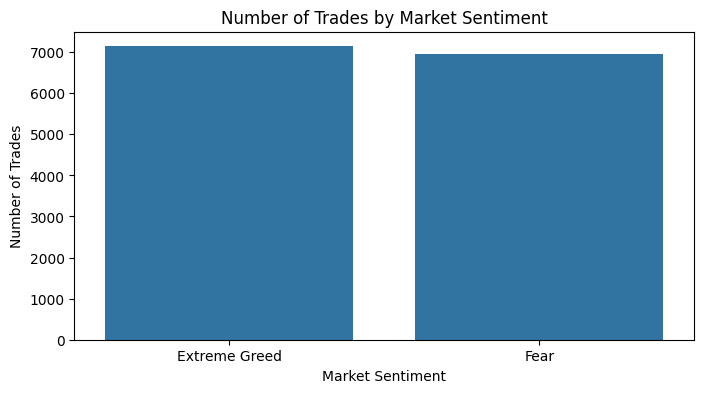

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of trades by sentiment classification
plt.figure(figsize=(8,4))
sns.countplot(data=merged_df, x='classification', order=merged_df['classification'].value_counts().index)
plt.title('Number of Trades by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.show()

classification
Extreme Greed    22.229713
Fear             25.418772
Name: Closed PnL, dtype: float64


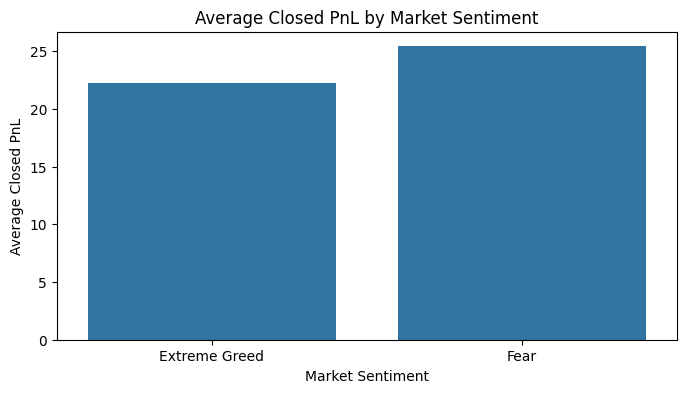

In [26]:
# Ensure Closed PnL is numeric
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

# Group by sentiment and calculate mean Closed PnL
performance_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()
print(performance_by_sentiment)

# Visualize
plt.figure(figsize=(8,4))
sns.barplot(x=performance_by_sentiment.index, y=performance_by_sentiment.values)
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.show()

In [27]:
# Calculate win rate (percentage of trades with positive Closed PnL) by sentiment
win_rate = merged_df.groupby('classification')['Closed PnL'].apply(lambda x: (x > 0).mean() * 100)
print(win_rate)

classification
Extreme Greed    31.718247
Fear             49.008905
Name: Closed PnL, dtype: float64


In [28]:
# Total USD traded by sentiment
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].sum()
print(volume_by_sentiment)

classification
Extreme Greed    21843234.35
Fear             39406770.25
Name: Size USD, dtype: float64


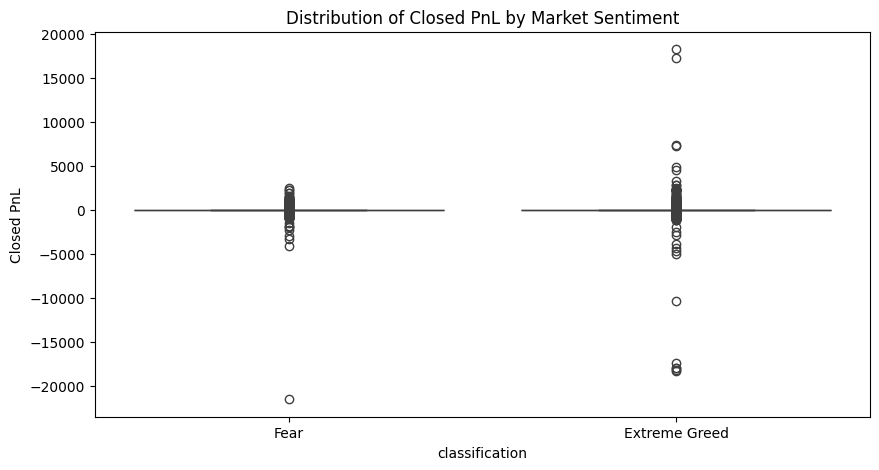

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.show()

Win Rate by Sentiment (%):
classification
Extreme Greed    31.718247
Fear             49.008905
Name: Closed PnL, dtype: float64


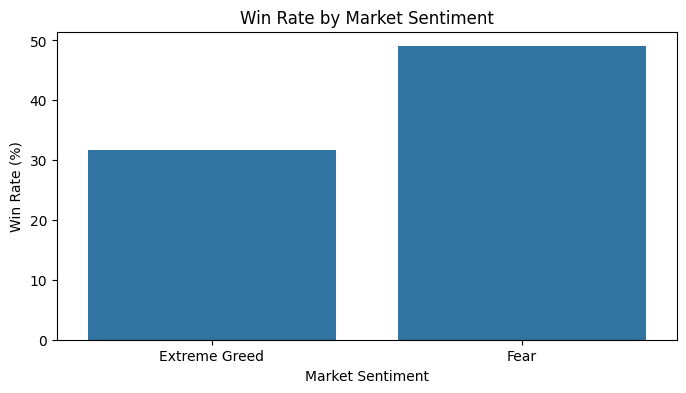

In [30]:
# Calculate win rate (percentage of trades with positive Closed PnL) by sentiment
win_rate = merged_df.groupby('classification')['Closed PnL'].apply(lambda x: (x > 0).mean() * 100)
print("Win Rate by Sentiment (%):")
print(win_rate)

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(x=win_rate.index, y=win_rate.values)
plt.title('Win Rate by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate (%)')
plt.show()

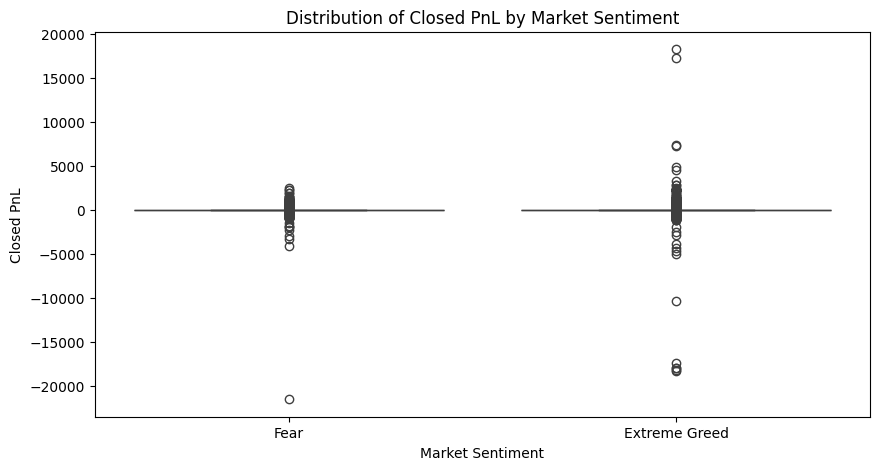

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.show()

Total USD Traded by Sentiment:
classification
Extreme Greed    21843234.35
Fear             39406770.25
Name: Size USD, dtype: float64


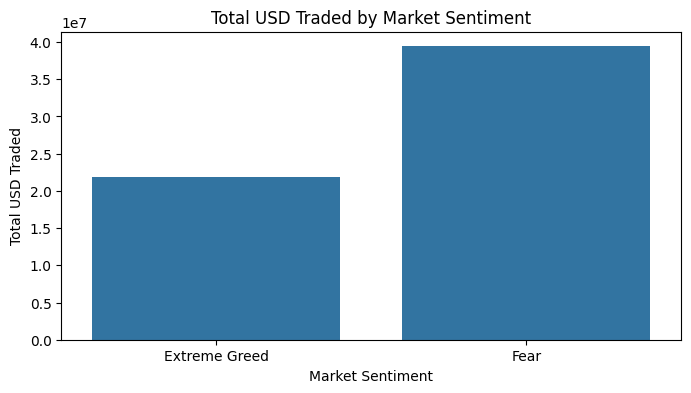

In [32]:
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].sum()
print("Total USD Traded by Sentiment:")
print(volume_by_sentiment)

plt.figure(figsize=(8,4))
sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values)
plt.title('Total USD Traded by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Total USD Traded')
plt.show()

In [33]:
summary = merged_df.groupby('classification').agg(
    trade_count=('Closed PnL', 'count'),
    avg_pnl=('Closed PnL', 'mean'),
    median_pnl=('Closed PnL', 'median'),
    win_rate=('Closed PnL', lambda x: (x > 0).mean() * 100),
    total_usd_traded=('Size USD', 'sum')
)
print(summary)

                trade_count    avg_pnl  median_pnl   win_rate  \
classification                                                  
Extreme Greed          7141  22.229713         0.0  31.718247   
Fear                   6962  25.418772         0.0  49.008905   

                total_usd_traded  
classification                    
Extreme Greed        21843234.35  
Fear                 39406770.25  
